In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
# !pip show tensorflow

In [5]:
from tensorflow.keras.models import Sequential, Model 

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [6]:
image_size = (128,128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255, # normalizating pixel values to [0,1]
    rotation_range = 20, # randomly zoom images
    zoom_range = 0.2, # randomly zoom image
    shear_range = 0.2, # randomly shear images
    horizontal_flip= True, # randomly flip images horizontally
    validation_split = 0.2 # split data into trainning and validation sets
    # it is operational only when no validation data is provoded
)

train_generator = train_datagen.flow_from_directory(
    'dataset/vitamin_project_dataset', # directory contains the dataset
    target_size = image_size, # resizing image to 128*128
    class_mode = 'categorical', # using categorical labels for multi-class classes
    batch_size = batch_size, # number of images to process in each batch
    subset = 'training' # indicating this is the training set
)

val_generator = train_datagen.flow_from_directory(
    'dataset/vitamin_project_dataset', # directory contains the dataset
    target_size = image_size, # resizing image to 128*128
    class_mode = 'categorical', # using categorical labels for multi-class classes
    batch_size = batch_size, # number of images to process in each batch
    subset = 'validation' # indicating this is the validation set   
)

Found 10480 images belonging to 11 classes.
Found 2614 images belonging to 11 classes.


In [7]:
mlp_model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(128, activation='relu'),
    Dense(64, activation="relu"),
    Dense(train_generator.num_classes, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mlp_model.fit(train_generator, validation_data=val_generator, epochs=10)

c:\Users\DELL\anaconda3\envs\vitamin\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\DELL\anaconda3\envs\vitamin\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.3996 - loss: 5.6791 - val_accuracy: 0.5367 - val_loss: 1.6207
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 241s 735ms/step - accuracy: 0.4616 - loss: 1.4277 - val_accuracy: 0.3229 - val_loss: 1.4575
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 264s 805ms/step - accuracy: 0.5103 - loss: 1.2545 - val_accuracy: 0.5356 - val_loss: 1.2578
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 269s 820ms/step - accuracy: 0.5217 - loss: 1.2083 - val_accuracy: 0.5386 - val_loss: 1.2699
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 262s 800ms/step - accuracy: 0.5329 - loss: 1.1712 - val_accuracy: 0.5356 - val_loss: 1.2793
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 204s 623ms/step - accuracy: 0.5307 - loss: 1.1992 - val_accuracy: 0.5115 - val_loss: 1.2510
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 229s 698ms/step - accuracy: 0.5175 - loss: 1.2016 - val_accuracy: 0.5360 - val_loss: 1.2542
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 222s 675ms/step - accuracy: 0.5284 - lo

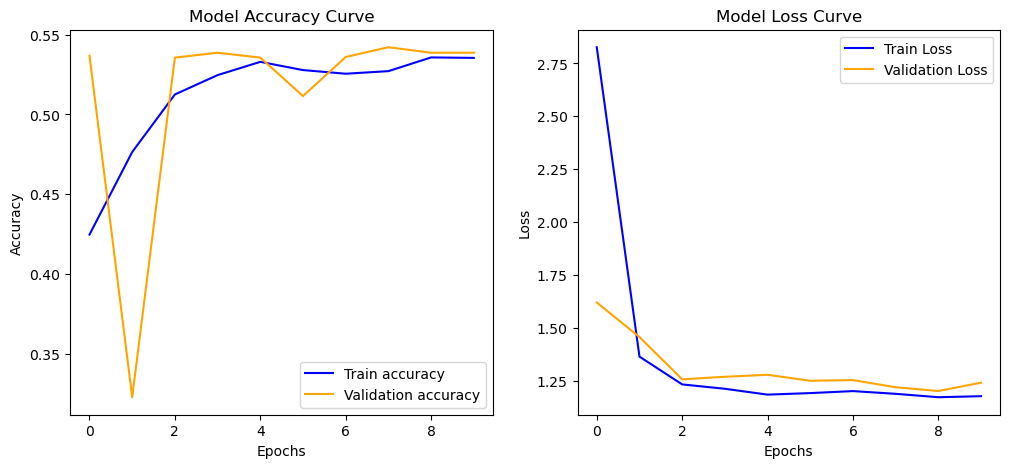

In [8]:
# plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [9]:
mlp_model.save('mlp_VD_model.h5')

In [10]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

c:\Users\DELL\anaconda3\envs\vitamin\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 176s 530ms/step - accuracy: 0.4945 - loss: 1.3810 - val_accuracy: 0.5386 - val_loss: 1.1403
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 203s 621ms/step - accuracy: 0.5297 - loss: 1.1793 - val_accuracy: 0.5379 - val_loss: 1.1777
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 186s 567ms/step - accuracy: 0.5464 - loss: 1.1456 - val_accuracy: 0.5386 - val_loss: 1.1389
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 169s 515ms/step - accuracy: 0.5385 - loss: 1.1260 - val_accuracy: 0.5298 - val_loss: 1.1681
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 182s 554ms/step - accuracy: 0.5416 - loss: 1.1216 - val_accuracy: 0.5310 - val_loss: 1.1568
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 186s 566ms/step - accuracy: 0.5396 - loss: 1.1081 - val_accuracy: 0.5386 - val_loss: 1.1333
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 188s 573ms/step - accuracy: 0.5424 - loss: 1.1277 - val_accuracy: 0.5394 - val_loss: 1.1358
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 187s 571ms/step - accuracy: 0.5393 -

In [11]:
cnn_model.save('cnn_VD_model.h5')

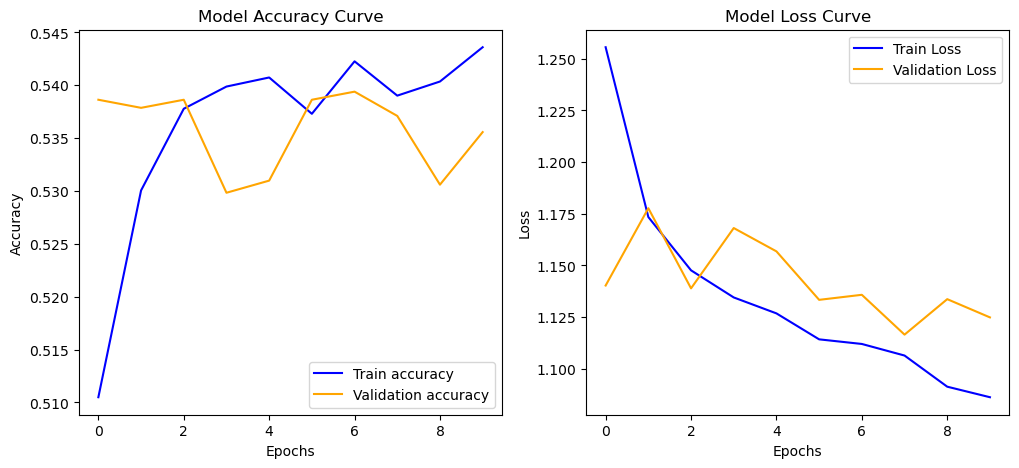

In [12]:
# plotting the history using accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [13]:
# initialize MobileNetV2 model
base_mobilenet_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# freezing the layers
base_mobilenet_model.trainable = False
# Pooling the output layer of the base model
x = GlobalAveragePooling2D()(base_mobilenet_model.output)
# keeping the hidden layer
x = Dense(128, activation='relu')(x)
# keeping output layer with required no.of classes
output = Dense(train_generator.num_classes, activation='softmax')(x)

MN_model_transfer = Model(inputs=base_mobilenet_model.input, outputs=output)

MN_model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = MN_model_transfer.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 198s 584ms/step - accuracy: 0.5115 - loss: 1.2150 - val_accuracy: 0.4969 - val_loss: 1.2271
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 188s 574ms/step - accuracy: 0.5788 - loss: 0.9640 - val_accuracy: 0.4836 - val_loss: 1.2689
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 191s 582ms/step - accuracy: 0.5936 - loss: 0.9090 - val_accuracy: 0.4946 - val_loss: 1.3748
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 190s 578ms/step - accuracy: 0.5919 - loss: 0.8879 - val_accuracy: 0.5027 - val_loss: 1.3369
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 191s 581ms/step - accuracy: 0.5992 - loss: 0.8715 - val_accuracy: 0.4858 - val_loss: 1.3677
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 192s 585ms/step - accuracy: 0.6063 - loss: 0.8585 - val_accuracy: 0.5011 - val_loss: 1.4015
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 296s 902ms/step - accuracy: 0.6167 - loss: 0.8325 - val_accuracy: 0.4816 - val_loss: 1.4643
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 209s 637ms/step - accuracy: 0.6279 -

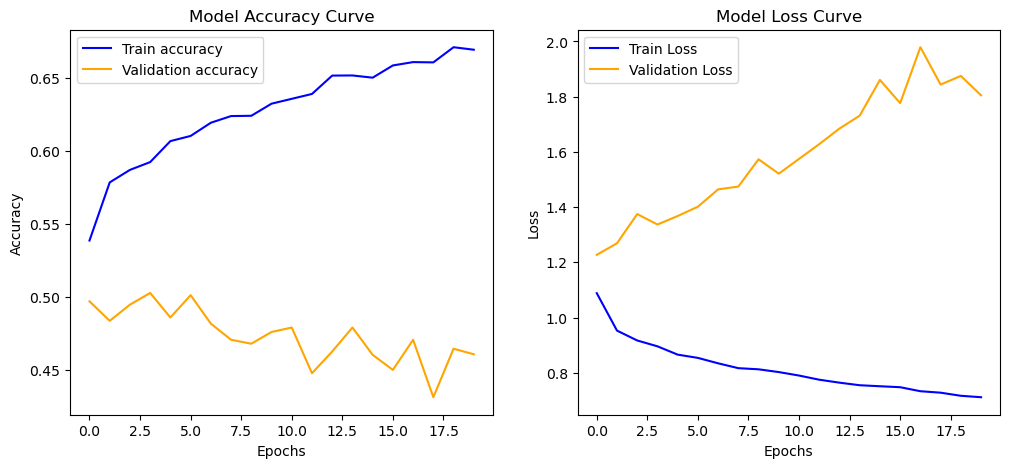

In [14]:
# plotting the history using accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [15]:
MN_model_transfer.save('MobileNet_VD_Model.h5')

In [16]:
from tensorflow.keras.applications import VGG16

# initialize VGG16 model
VGG_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# freezing the layers
VGG_model.trainable = False
# Pooling the output layer of the base model
x = GlobalAveragePooling2D()(VGG_model.output)
# keeping the hidden layer
x = Dense(128, activation='relu')(x)
# keeping output layer with required no.of classes
output = Dense(train_generator.num_classes, activation='softmax')(x)

vgg_model_transfer = Model(inputs=VGG_model.input, outputs=output)

vgg_model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg_model_transfer.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.5227 - loss: 1.2545 - val_accuracy: 0.5471 - val_loss: 1.1193
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.5516 - loss: 1.0882 - val_accuracy: 0.5352 - val_loss: 1.1354
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.5619 - loss: 1.0496 - val_accuracy: 0.5356 - val_loss: 1.1509
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 716s 2s/step - accuracy: 0.5599 - loss: 1.0287 - val_accuracy: 0.5279 - val_loss: 1.1384
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.5574 - loss: 1.0187 - val_accuracy: 0.5157 - val_loss: 1.1541
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - accuracy: 0.5572 - loss: 1.0162 - val_accuracy: 0.5222 - val_loss: 1.2063
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.5671 - loss: 0.9995 - val_accuracy: 0.5233 - val_loss: 1.1752
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - accuracy: 0.5695 - loss: 0.9856 - val_accu

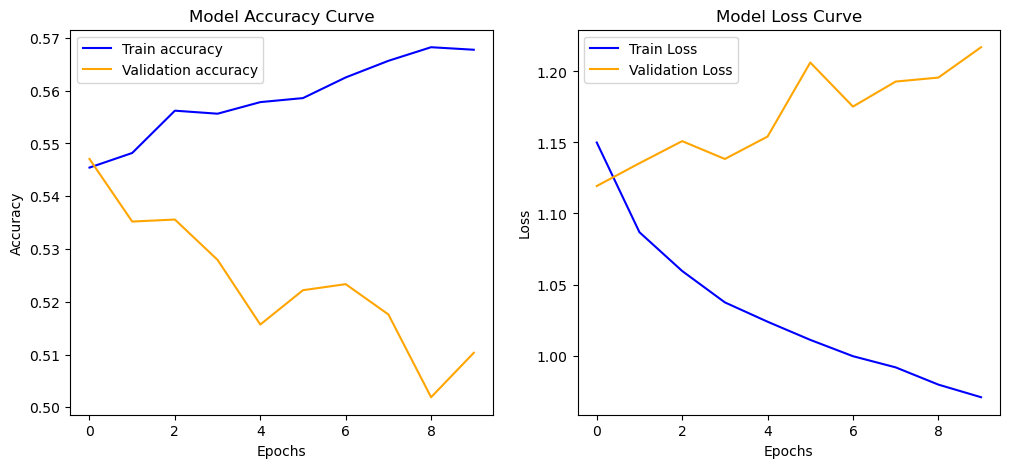

In [17]:
# plotting the history using accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [18]:
vgg_model_transfer.save('VGG_VD_Model.h5')

In [ ]:
from tensorflow.keras.applications import ResNet50
# initialize ResNet50 model
ResNet_model = ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# freezing the layers
ResNet_model.trainable = False
# Pooling the output layer of the base model
x = GlobalAveragePooling2D()(ResNet_model.output)
# keeping the hidden layer
x = Dense(128, activation='relu')(x)
# keeping output layer with required no.of classes
output = Dense(train_generator.num_classes, activation='softmax')(x)
ResNet_model_transfer = Model(inputs=ResNet_model.input, outputs=output)
ResNet_model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ResNet_model_transfer.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 322s 962ms/step - accuracy: 0.5166 - loss: 1.2827 - val_accuracy: 0.5386 - val_loss: 1.1694
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 310s 946ms/step - accuracy: 0.5455 - loss: 1.1669 - val_accuracy: 0.5386 - val_loss: 1.1696
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 299s 911ms/step - accuracy: 0.5334 - loss: 1.1781 - val_accuracy: 0.5383 - val_loss: 1.1508
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 292s 892ms/step - accuracy: 0.5504 - loss: 1.1536 - val_accuracy: 0.5386 - val_loss: 1.1583
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 293s 893ms/step - accuracy: 0.5430 - loss: 1.1586 - val_accuracy: 0.5383 - val_loss: 1.1565
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 292s 891ms/step - accuracy: 0.5404 - loss: 1.1643 - val_accuracy: 0.5360 - val_loss: 1.1614
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 292s 892ms/step - accuracy: 0.5452 - loss: 1.1486 - val_accuracy: 0.5386 - val_loss: 1.1690
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 293s 893ms/step - accuracy: 0.5367 -

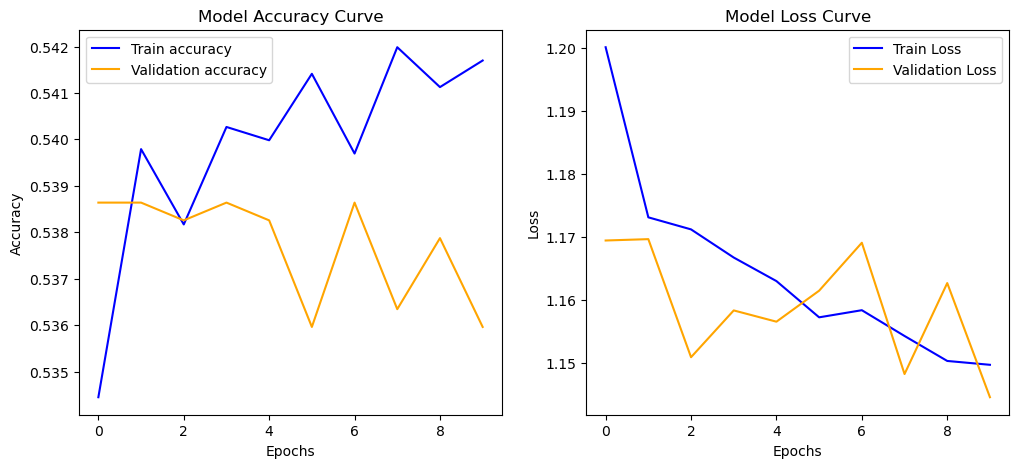

In [20]:
# plotting the history using accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [21]:
ResNet_model_transfer.save('ResNet_VD_Model.h5')

In [22]:
from tensorflow.keras.applications import EfficientNetB0

EfficientNet_model = EfficientNetB0(input_shape=(128, 128, 3),include_top=False,weights='imagenet')

# Freeze pretrained layers
EfficientNet_model.trainable = False

# Add classification layers
x = GlobalAveragePooling2D()(EfficientNet_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model_efficientnet = Model(inputs=EfficientNet_model.input, outputs=output)

# Compile
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_efficientnet.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 187s 543ms/step - accuracy: 0.5200 - loss: 1.2426 - val_accuracy: 0.5386 - val_loss: 1.1764
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 174s 532ms/step - accuracy: 0.5377 - loss: 1.1820 - val_accuracy: 0.5386 - val_loss: 1.1985
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 179s 544ms/step - accuracy: 0.5300 - loss: 1.1926 - val_accuracy: 0.5386 - val_loss: 1.2089
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 173s 527ms/step - accuracy: 0.5303 - loss: 1.1848 - val_accuracy: 0.5386 - val_loss: 1.1723
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 171s 522ms/step - accuracy: 0.5277 - loss: 1.1951 - val_accuracy: 0.5386 - val_loss: 1.1788
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 173s 527ms/step - accuracy: 0.5355 - loss: 1.1837 - val_accuracy: 0.5386 - val_loss: 1.1663
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 184s 562ms/step - accuracy: 0.5403 - loss: 1.1722 - val_accuracy: 0.5386 - val_loss: 1.1693
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 172s 526ms/step - accuracy: 0.5447 -

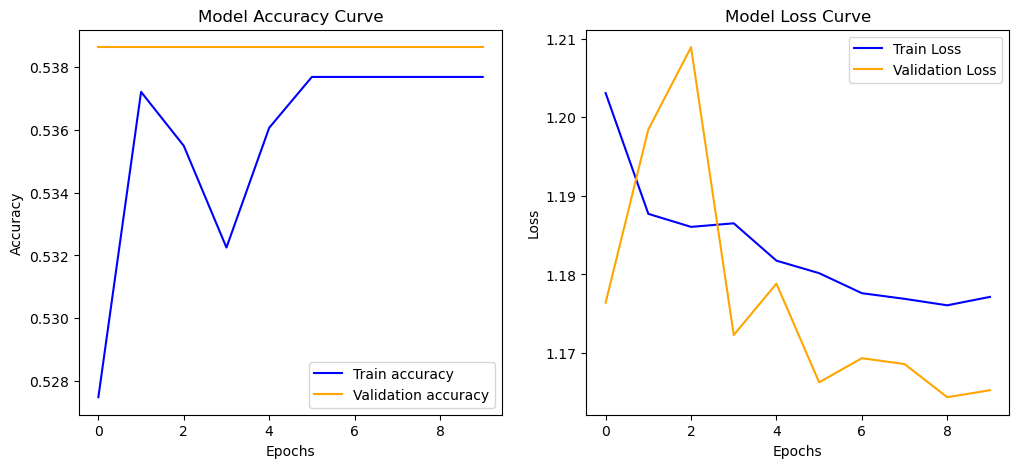

In [23]:
# plotting the history using accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Trainning Accuracy', color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy', color='orange')
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train accuracy','Validation accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='blue',label='Training Loss')
plt.plot(history.history['val_loss'], color='orange',label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train Loss','Validation Loss'])
plt.show()


In [24]:
model_efficientnet.save('EfficientNet_VD_Model.h5')

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation data
Y_pred = MN_model_transfer.predict(val_generator)
Y_pred

82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 420ms/step


array([[2.5446215e-01, 1.5908328e-01, 2.2631064e-04, ..., 2.0404528e-03,
        1.7985412e-05, 9.9353725e-04],
       [2.1757780e-01, 1.6814312e-02, 2.1250238e-05, ..., 1.9121577e-05,
        1.1004489e-05, 1.9863360e-03],
       [4.5580012e-03, 1.7766368e-03, 1.7129138e-10, ..., 1.5406962e-11,
        3.6303454e-12, 5.0130153e-09],
       ...,
       [1.0783819e-01, 3.9221090e-01, 1.6721971e-07, ..., 1.6456521e-09,
        1.0948839e-06, 3.3191394e-04],
       [1.7414592e-01, 1.5854275e-01, 1.6378165e-04, ..., 5.3719208e-07,
        4.6989469e-05, 8.2919243e-05],
       [7.4862368e-02, 7.6558103e-04, 2.1027139e-08, ..., 1.0324990e-09,
        2.3399048e-06, 8.1018949e-01]], dtype=float32)

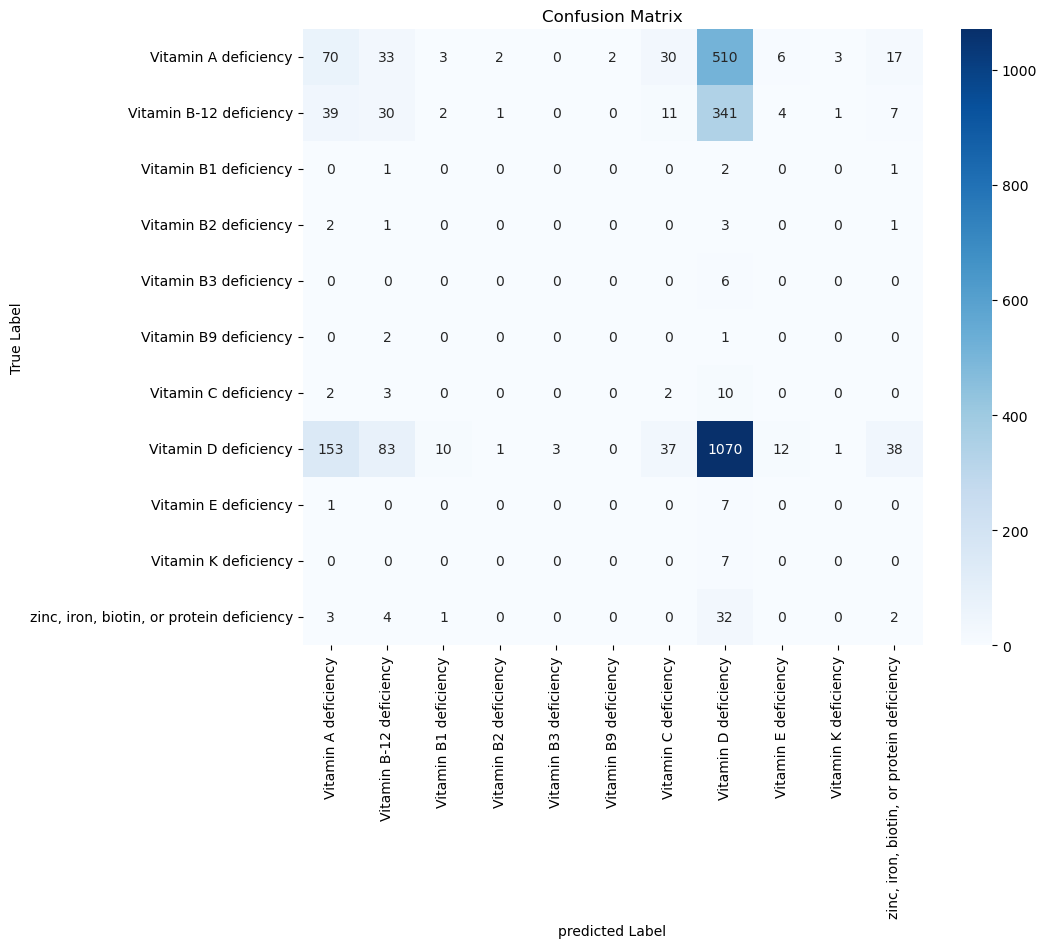

In [26]:
# use np.argmax only for multiclass problems
# else use if condition
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
# classification report -Basic
print("Classification Report (Detailed):")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

Classification Report (Detailed):
                                           precision    recall  f1-score   support

                     Vitamin A deficiency       0.26      0.10      0.15       676
                  Vitamin B-12 deficiency       0.19      0.07      0.10       436
                    Vitamin B1 deficiency       0.00      0.00      0.00         4
                    Vitamin B2 deficiency       0.00      0.00      0.00         7
                    Vitamin B3 deficiency       0.00      0.00      0.00         6
                    Vitamin B9 deficiency       0.00      0.00      0.00         3
                     Vitamin C deficiency       0.03      0.12      0.04        17
                     Vitamin D deficiency       0.54      0.76      0.63      1408
                     Vitamin E deficiency       0.00      0.00      0.00         8
                     Vitamin K deficiency       0.00      0.00      0.00         7
zinc, iron, biotin, or protein deficiency       0.03

In [28]:
from tensorflow.keras.preprocessing import image

def predict_image(model, image_path, class_indices, target_size=(128,128)):

    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0) # Shape:(1, height, width, 3)

    predictions= model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    confidence =predictions[0][predicted_index] 

    #Reverse the class indices dictionary
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[predicted_index]
    
    print(f"Predicted class: { predicted_class} | Confidence: {confidence:.2f}")
    return predicted_class, confidence

In [31]:
from tensorflow.keras.models import load_model
model=load_model('MobileNet_VD_Model.h5')

In [35]:
predict_image(model,r"C:\vitamin_project\dataset\vitamin_project_dataset\Vitamin A deficiency\9.PNG",val_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: Vitamin C deficiency | Confidence: 0.66


('Vitamin C deficiency', np.float32(0.6558957))

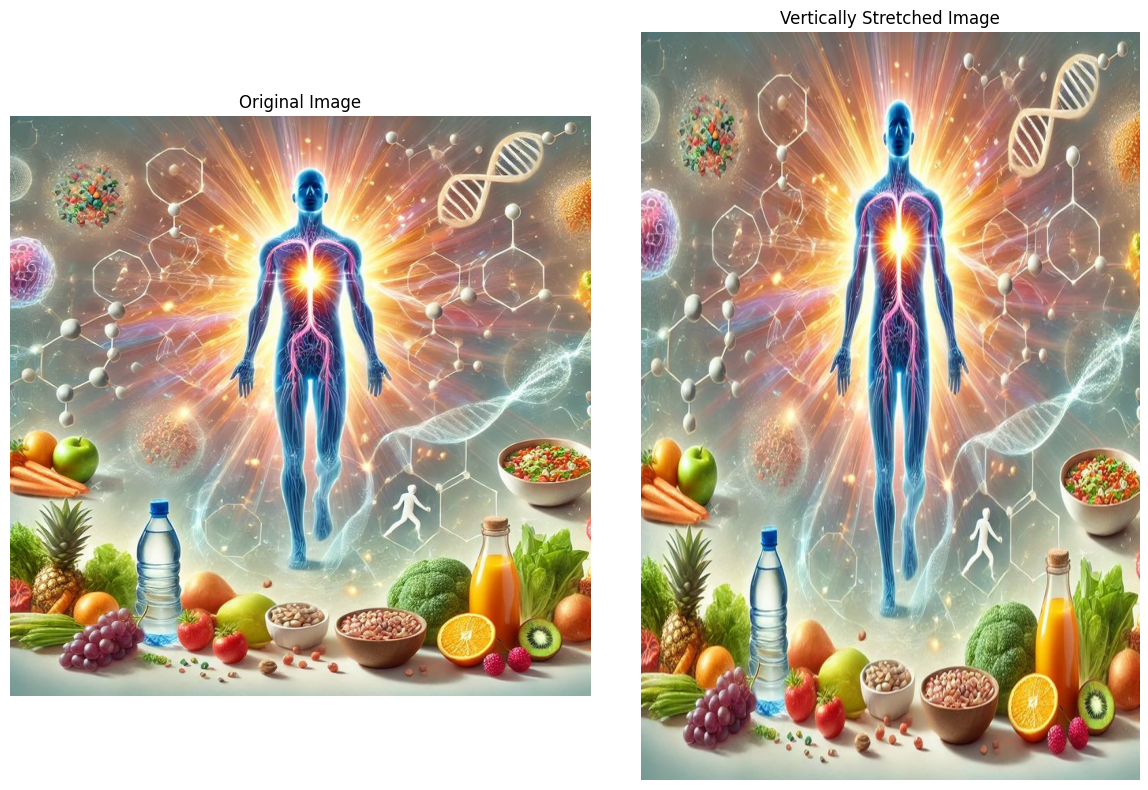

In [ ]:
"""
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "static/images/image1.png"
image = Image.open(image_path)

# Stretch the image vertically (e.g., scale height by 1.5)
width, height = image.size
stretched_image = image.resize((width, int(height * 1.5)))

# Display the original and stretched images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(stretched_image)
axs[1].set_title("Vertically Stretched Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()
"""

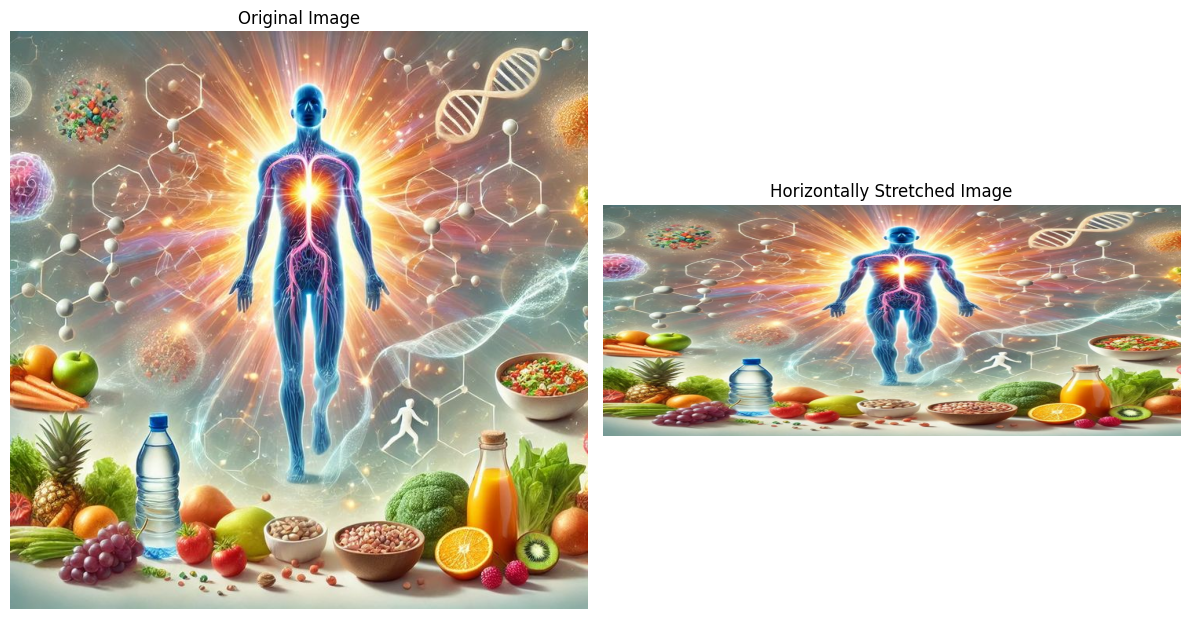

In [ ]:
"""
# Stretch the image horizontally (e.g., scale width by 1.5)
horizontally_stretched_image = image.resize((int(width * 2.5), height))

# Display the original and horizontally stretched images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(horizontally_stretched_image)
axs[1].set_title("Horizontally Stretched Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()
"""

In [ ]:
"""
# Save the horizontally stretched image
output_path = "static/images/image.png"
horizontally_stretched_image.save(output_path)

output_path
"""

'static/images/image.png'

In [ ]:
#!pip install -r requirements.txt

Processing c:\b\abs_98xvdek9qa\croot\aext-assistant_1734644152369\work (from -r requirements.txt (line 2))


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_98xvdek9qa\\croot\\aext-assistant_1734644152369\\work'



In [4]:
from moviepy.editor import (
    TextClip,
    CompositeVideoClip,
    concatenate_videoclips,
    AudioFileClip,
    ColorClip
)
from gtts import gTTS

# ========== Settings ==========
width, height = 720, 1280  # Portrait mode
primary_color = (106, 5, 114)    # Deep Plum Purple
secondary_color = (251, 80, 18)  # Fiery Orange
output_video = "VitaDetect_Promo.mp4"
voiceover_file = "vita_voiceover.mp3"

# ========== Voiceover Script ==========
script = [
    "Tired all the time? Hair falling? Skin issues? What if it’s not just stress... but a vitamin deficiency?",
    "Introducing VitaDetect – an AI-powered tool that detects early signs of vitamin deficiencies like Vitamin D, B12, Iron, and Calcium.",
    "Just upload your photo. Our intelligent system analyzes facial features to give you a personalized report.",
    "With VitaDetect, you get early detection, personalized tips, and progress tracking.",
    "Your health is in your hands. Start your free scan today!"
]

# ========== Generate Voiceover ==========
print("Generating voiceover...")
tts = gTTS(" ".join(script))
tts.save(voiceover_file)

# ========== Scene Durations ==========
scene_durations = [6, 12, 12, 15, 15]  # seconds

# ========== Texts for Each Scene ==========
scene_texts = [
    "Tired all the time?\nHair falling?\nSkin issues?\nIt might be vitamin deficiency.",
    "VitaDetect uses AI to detect deficiencies\nlike Vitamin D, B12, Iron, Calcium.",
    "Upload your photo.\nOur AI gives instant reports.",
    "✅ Early detection\n✅ Personalized tips\n✅ Track progress",
    "Start your free scan today!\nVitaDetect"
]

# ========== Create Video Scenes ==========
clips = []
for i, (text, duration) in enumerate(zip(scene_texts, scene_durations)):
    background = ColorClip(size=(width, height), color=primary_color, duration=duration)
    txt_clip = TextClip(text, fontsize=48, color='white', size=(width - 100, None), method='caption', align='center')
    txt_clip = txt_clip.set_duration(duration).set_position("center")
    scene = CompositeVideoClip([background, txt_clip])
    clips.append(scene)

# ========== Combine All ==========
final_video = concatenate_videoclips(clips)
final_video = final_video.set_audio(AudioFileClip(voiceover_file))

# ========== Export ==========
print("Rendering video...")
final_video.write_videofile(output_video, fps=24)

print("✅ Video saved as:", output_video)


ModuleNotFoundError: No module named 'moviepy.editor'